# Investigate the different values of CKA

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import scipy
import sklearn
import torch
import matplotlib.pyplot as plt
from shallow_fbcsp import ShallowFBCSPNet
from collections import OrderedDict, Counter

In [2]:
df_shallow = pd.read_csv("CKA_Shallow.csv", delimiter = "\t")
df_collapsed_shallow = pd.read_csv("CKA_Collapsed_Shallow.csv", delimiter = "\t")
df_conformer = pd.read_csv("CKA_Conformer.csv", delimiter = "\t")
df_Collapsed_conformer = pd.read_csv("CKA_Collapsed_Conformer.csv", delimiter = "\t")

In [3]:
from collections import defaultdict

# Create a defaultdict with float so missing keys start at 0.0
def mean_and_count(df):
    cka_counter = defaultdict(list)

    # Iterate over DataFrame and add CKA values to the counter
    for _, row in df.iterrows():
        pair = (row['Layer1'], row['Layer2'])
        cka_counter[pair].append(row['CKA_Value'])

    # Check what we’ve got

    mean_dict = {}
    for pair, total_cka in cka_counter.items():
        avg_cka = sum(total_cka)/len(total_cka)
        mean_dict[pair] = avg_cka
        #print(f"{pair}: {total_cka}")
    return cka_counter, mean_dict

shallow_counter_dict, shallow_mean_dict = mean_and_count(df_shallow)
collapsed_shallow_counter_dict, collapsed_shallow_mean_dict = mean_and_count(df_collapsed_shallow)
conformer_counter_dict, conformer_mean_dict = mean_and_count(df_conformer)
Collapsed_conformer_counter_dict, Collapsed_conformer_mean_dict = mean_and_count(df_Collapsed_conformer)


In [4]:
#mean_dict

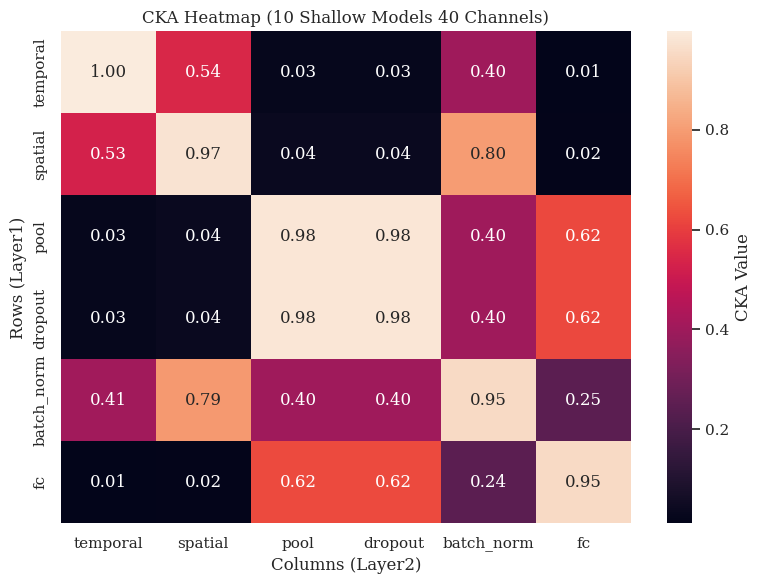

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cka_heatmap(mean_dict, title):
    # Extract unique row and column labels
    rows = [key[0] for key in mean_dict.keys()]
    rows = list(dict.fromkeys(rows))  # Remove duplicates while preserving order
    cols = [key[1] for key in mean_dict.keys()]
    cols = list(dict.fromkeys(cols))  # Remove duplicates while preserving order

    # Create an empty DataFrame filled with NaN
    heatmap_data = pd.DataFrame(index=rows, columns=cols)

    # Populate the DataFrame with the values from mean_dict
    for (row, col), value in mean_dict.items():
        heatmap_data.at[row, col] = value

    # Convert to float (since NaN handling can create object types)
    heatmap_data = heatmap_data.astype(float)

    # Create the heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cbar_kws={'label': 'CKA Value'})
    
    # Optional: customize axes labels and title
    plt.title(title)
    plt.xlabel('Columns (Layer2)')
    plt.ylabel('Rows (Layer1)')

    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
# Assuming `mean_dict` is already defined as your dictionary of CKA values
plot_cka_heatmap(shallow_mean_dict, 'CKA Heatmap (10 Shallow Models 40 Channels)')


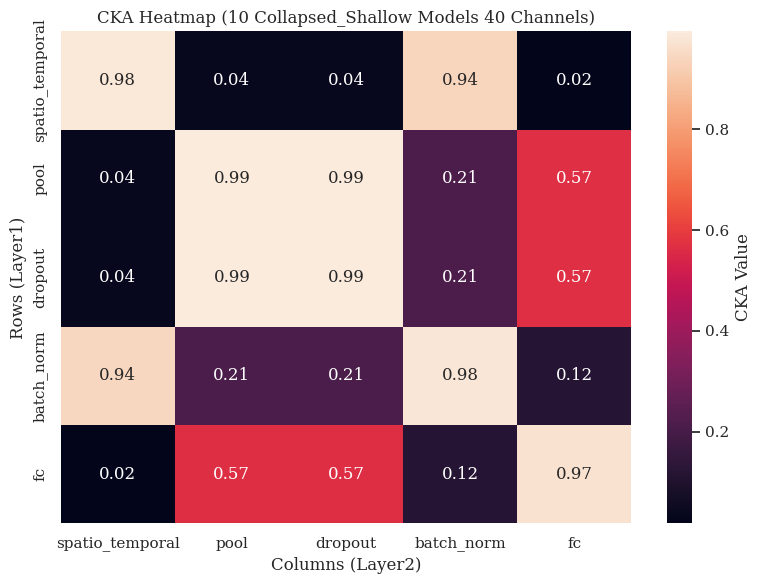

In [6]:
plot_cka_heatmap(collapsed_shallow_mean_dict, 'CKA Heatmap (10 Collapsed_Shallow Models 40 Channels)')

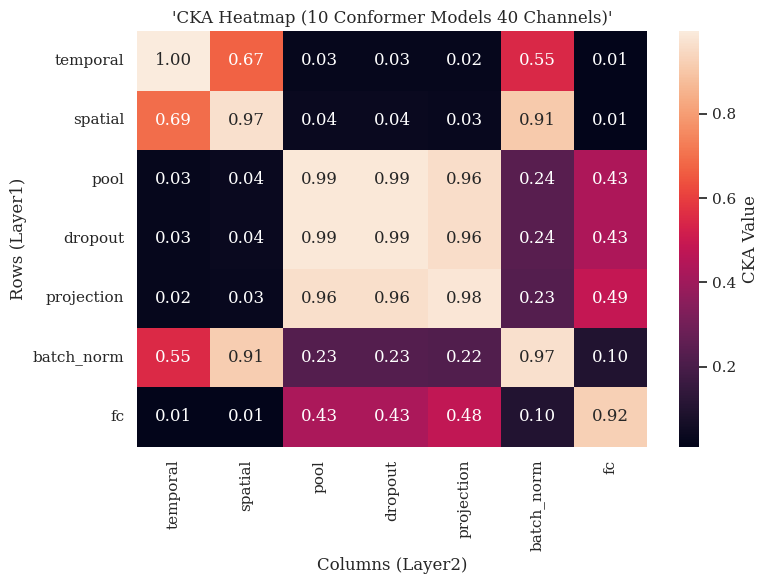

In [7]:
plot_cka_heatmap(conformer_mean_dict, "'CKA Heatmap (10 Conformer Models 40 Channels)'")

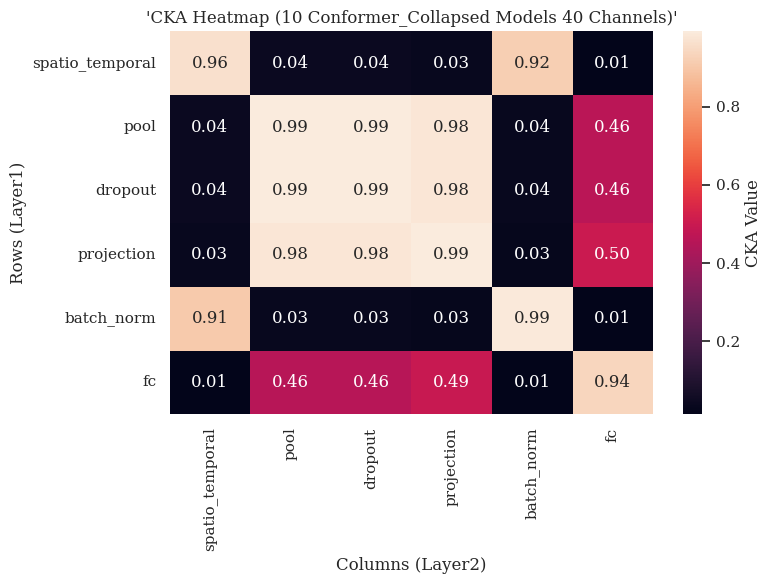

In [19]:
plot_cka_heatmap(Collapsed_conformer_mean_dict, "'CKA Heatmap (10 Conformer_Collapsed Models 40 Channels)'")

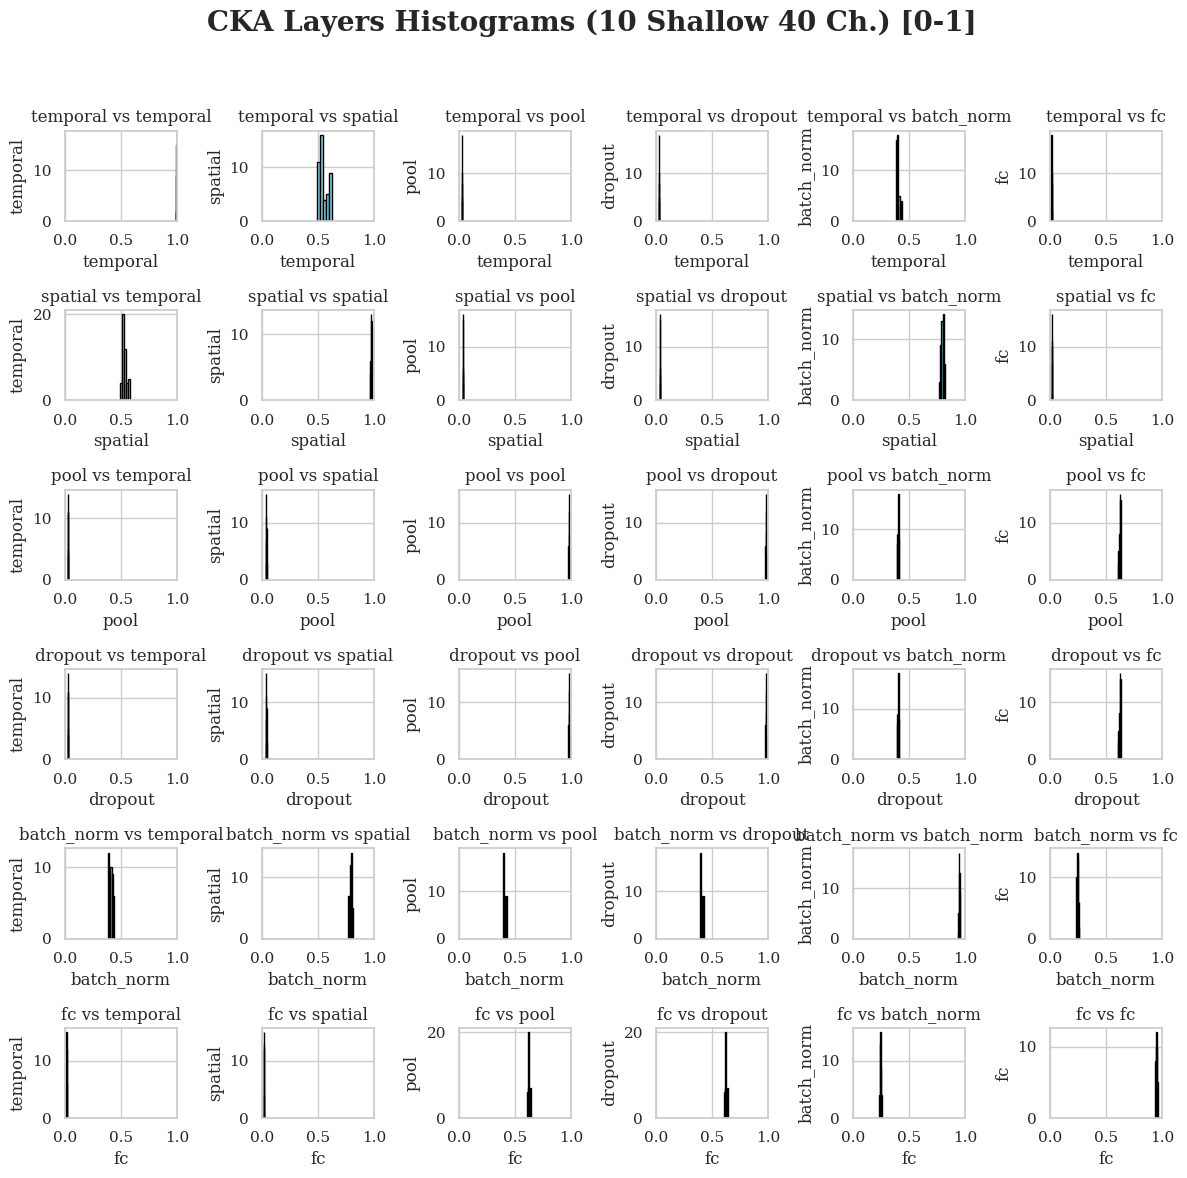

In [9]:

def plot_cka_histograms(counter_dict, title):
    # Set up a 3x3 grid of subplots
    rows_cols = int(len(list(counter_dict.keys()))**0.5)
    fig, axes = plt.subplots(rows_cols, rows_cols, figsize=(12, 12))

    # Flatten axes array so we can iterate over it
    axes = axes.flatten()

    # Iterate over the defaultdict and plot each pair's histogram
    for idx, ((layer1, layer2), values) in enumerate(counter_dict.items()):
        ax = axes[idx]
        ax.set_xlim(0, 1)  # Set X-axis limits from 0 to 1
        # Plot histogram
        ax.hist(values, bins=5, color='skyblue', edgecolor='black')
        # Set titles and labels
        ax.set_title(f"{layer1} vs {layer2}")
        ax.set_xlabel(layer1)
        ax.set_ylabel(layer2)

    # Hide any unused subplots (if there are fewer than 9 pairs)
    for ax in axes[len(counter_dict):]:
        ax.set_visible(False)

    # Set overall title on the figure
    fig.suptitle(title, fontsize=20, weight='bold')

    # Adjust layout to avoid overlapping with the overall title
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show the plot
    plt.show()

# Example usage:
# Assuming 'shallow_counter_dict' is your dictionary with CKA values
plot_cka_histograms(shallow_counter_dict, 'CKA Layers Histograms (10 Shallow 40 Ch.) [0-1]')


In [10]:
#collapsed_shallow_counter_dict

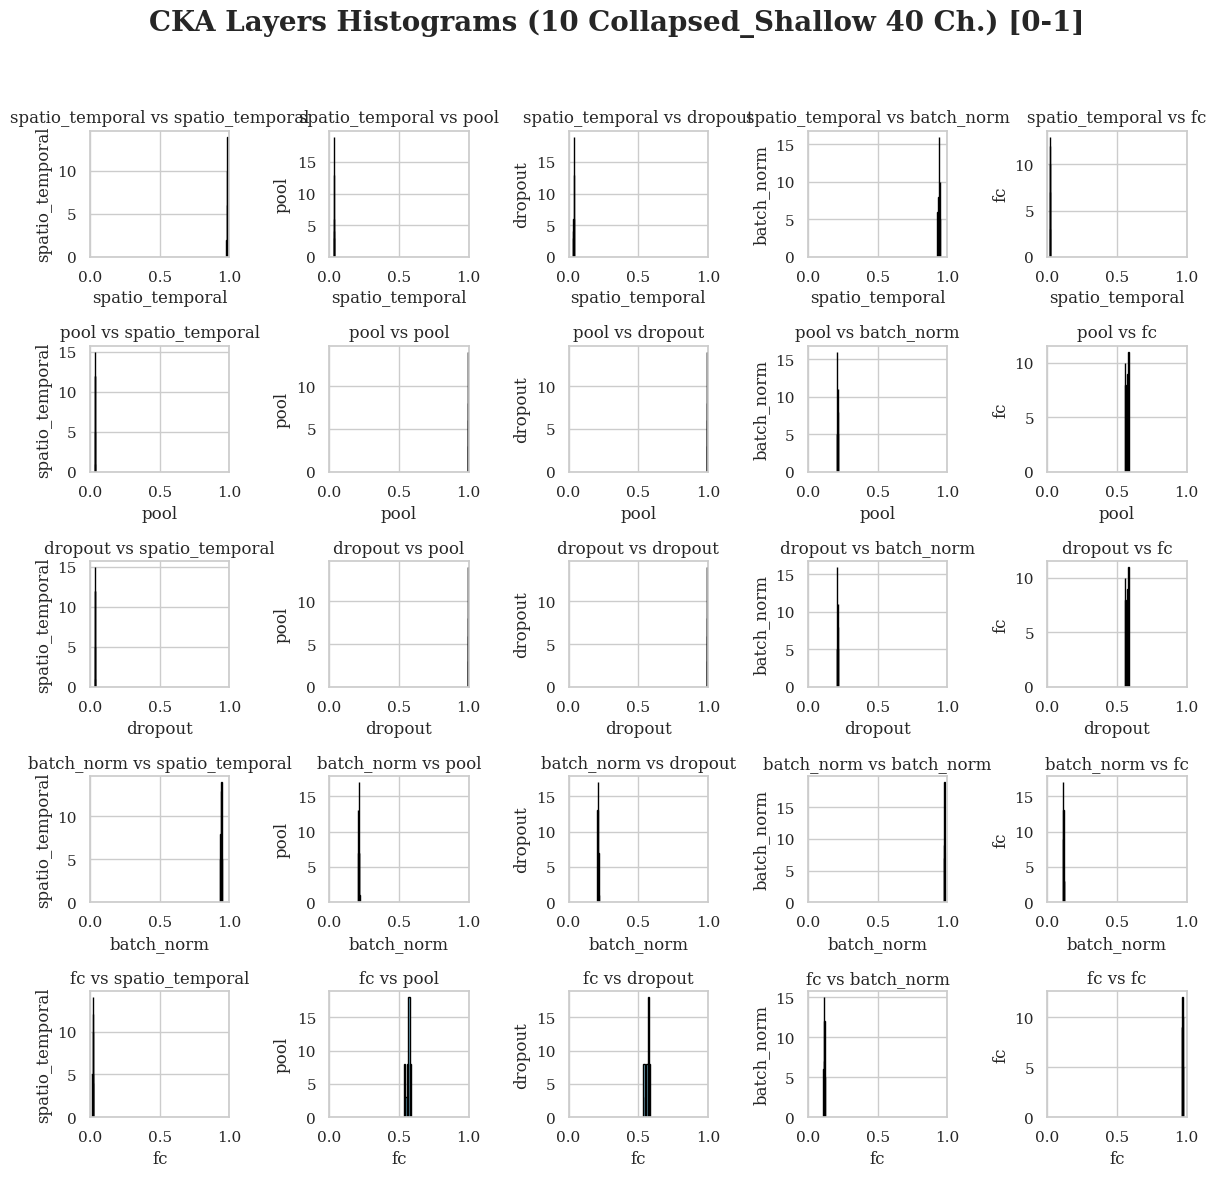

In [11]:
plot_cka_histograms(collapsed_shallow_counter_dict, 'CKA Layers Histograms (10 Collapsed_Shallow 40 Ch.) [0-1]')

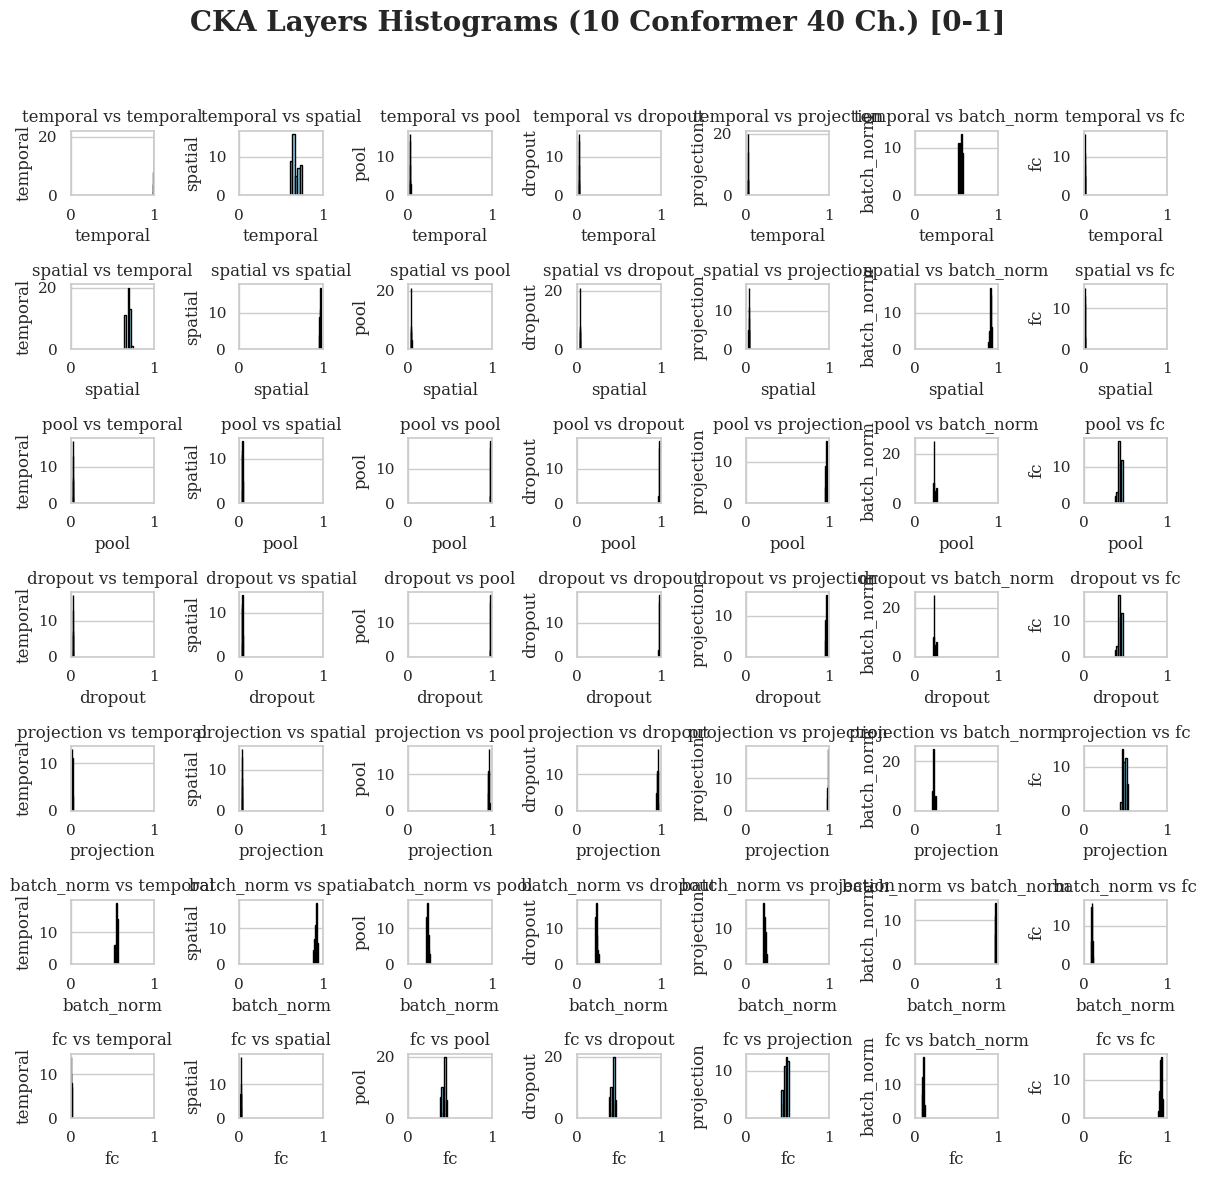

In [12]:
plot_cka_histograms(conformer_counter_dict, 'CKA Layers Histograms (10 Conformer 40 Ch.) [0-1]')

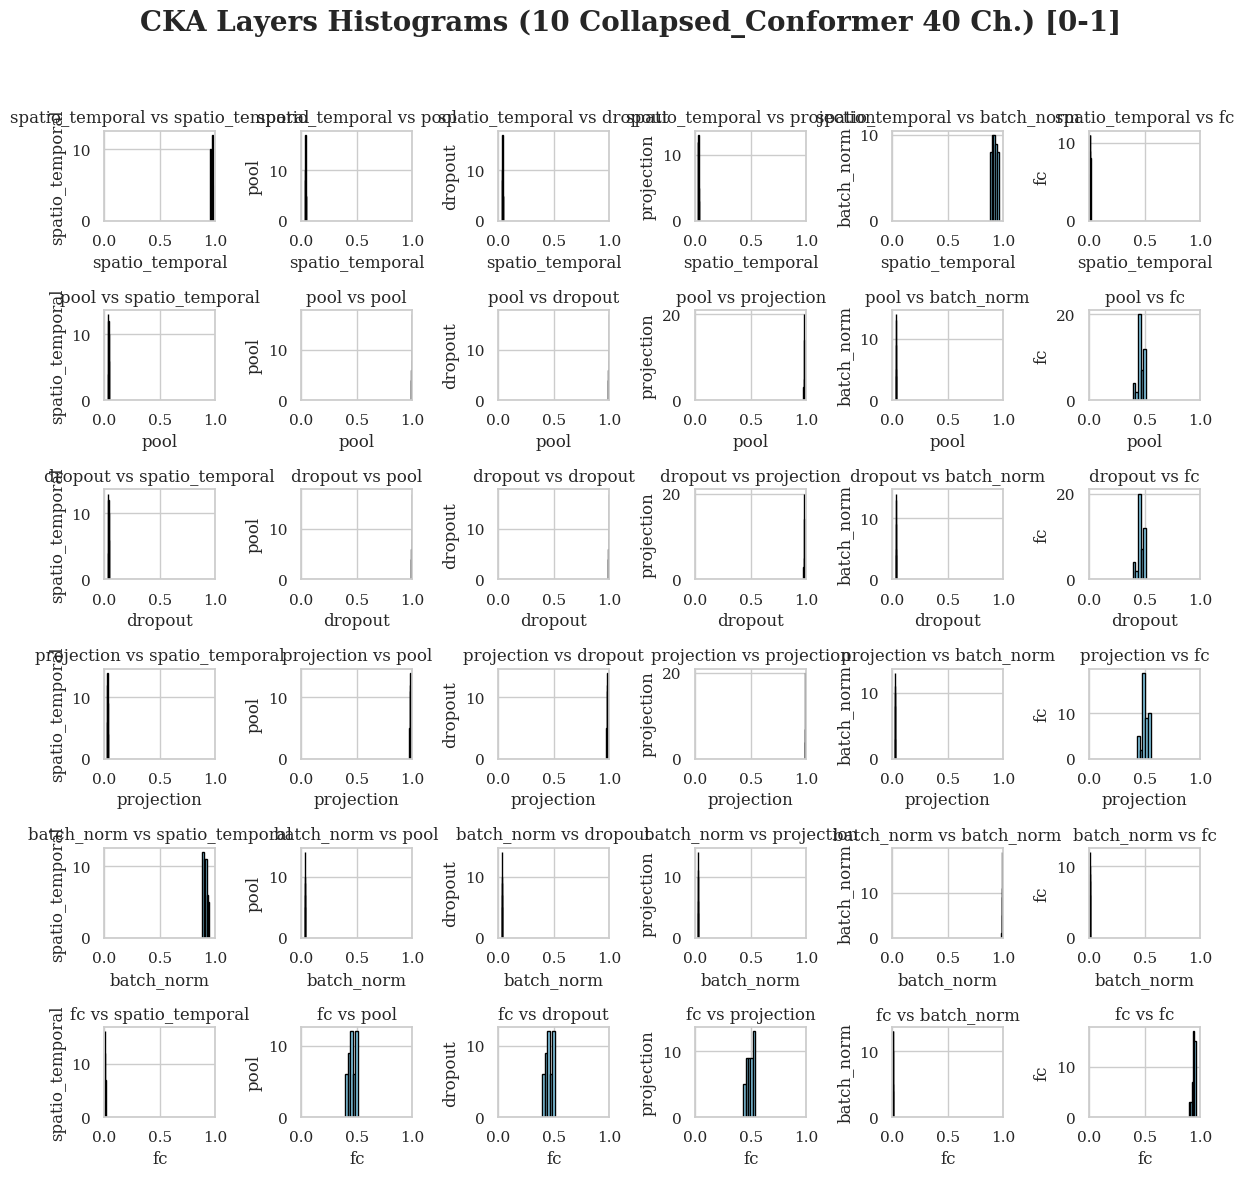

In [13]:
plot_cka_histograms(Collapsed_conformer_counter_dict, 'CKA Layers Histograms (10 Collapsed_Conformer 40 Ch.) [0-1]')

In [14]:
### Non-parametric-bootrap which enforces Between 0 and 1.
def non_parametric_bootstrap(data, stat_func, n_resamples=2000):
    resamples = np.random.choice(data, size=(n_resamples, len(data)), replace=True)
    return np.apply_along_axis(stat_func, 1, resamples)


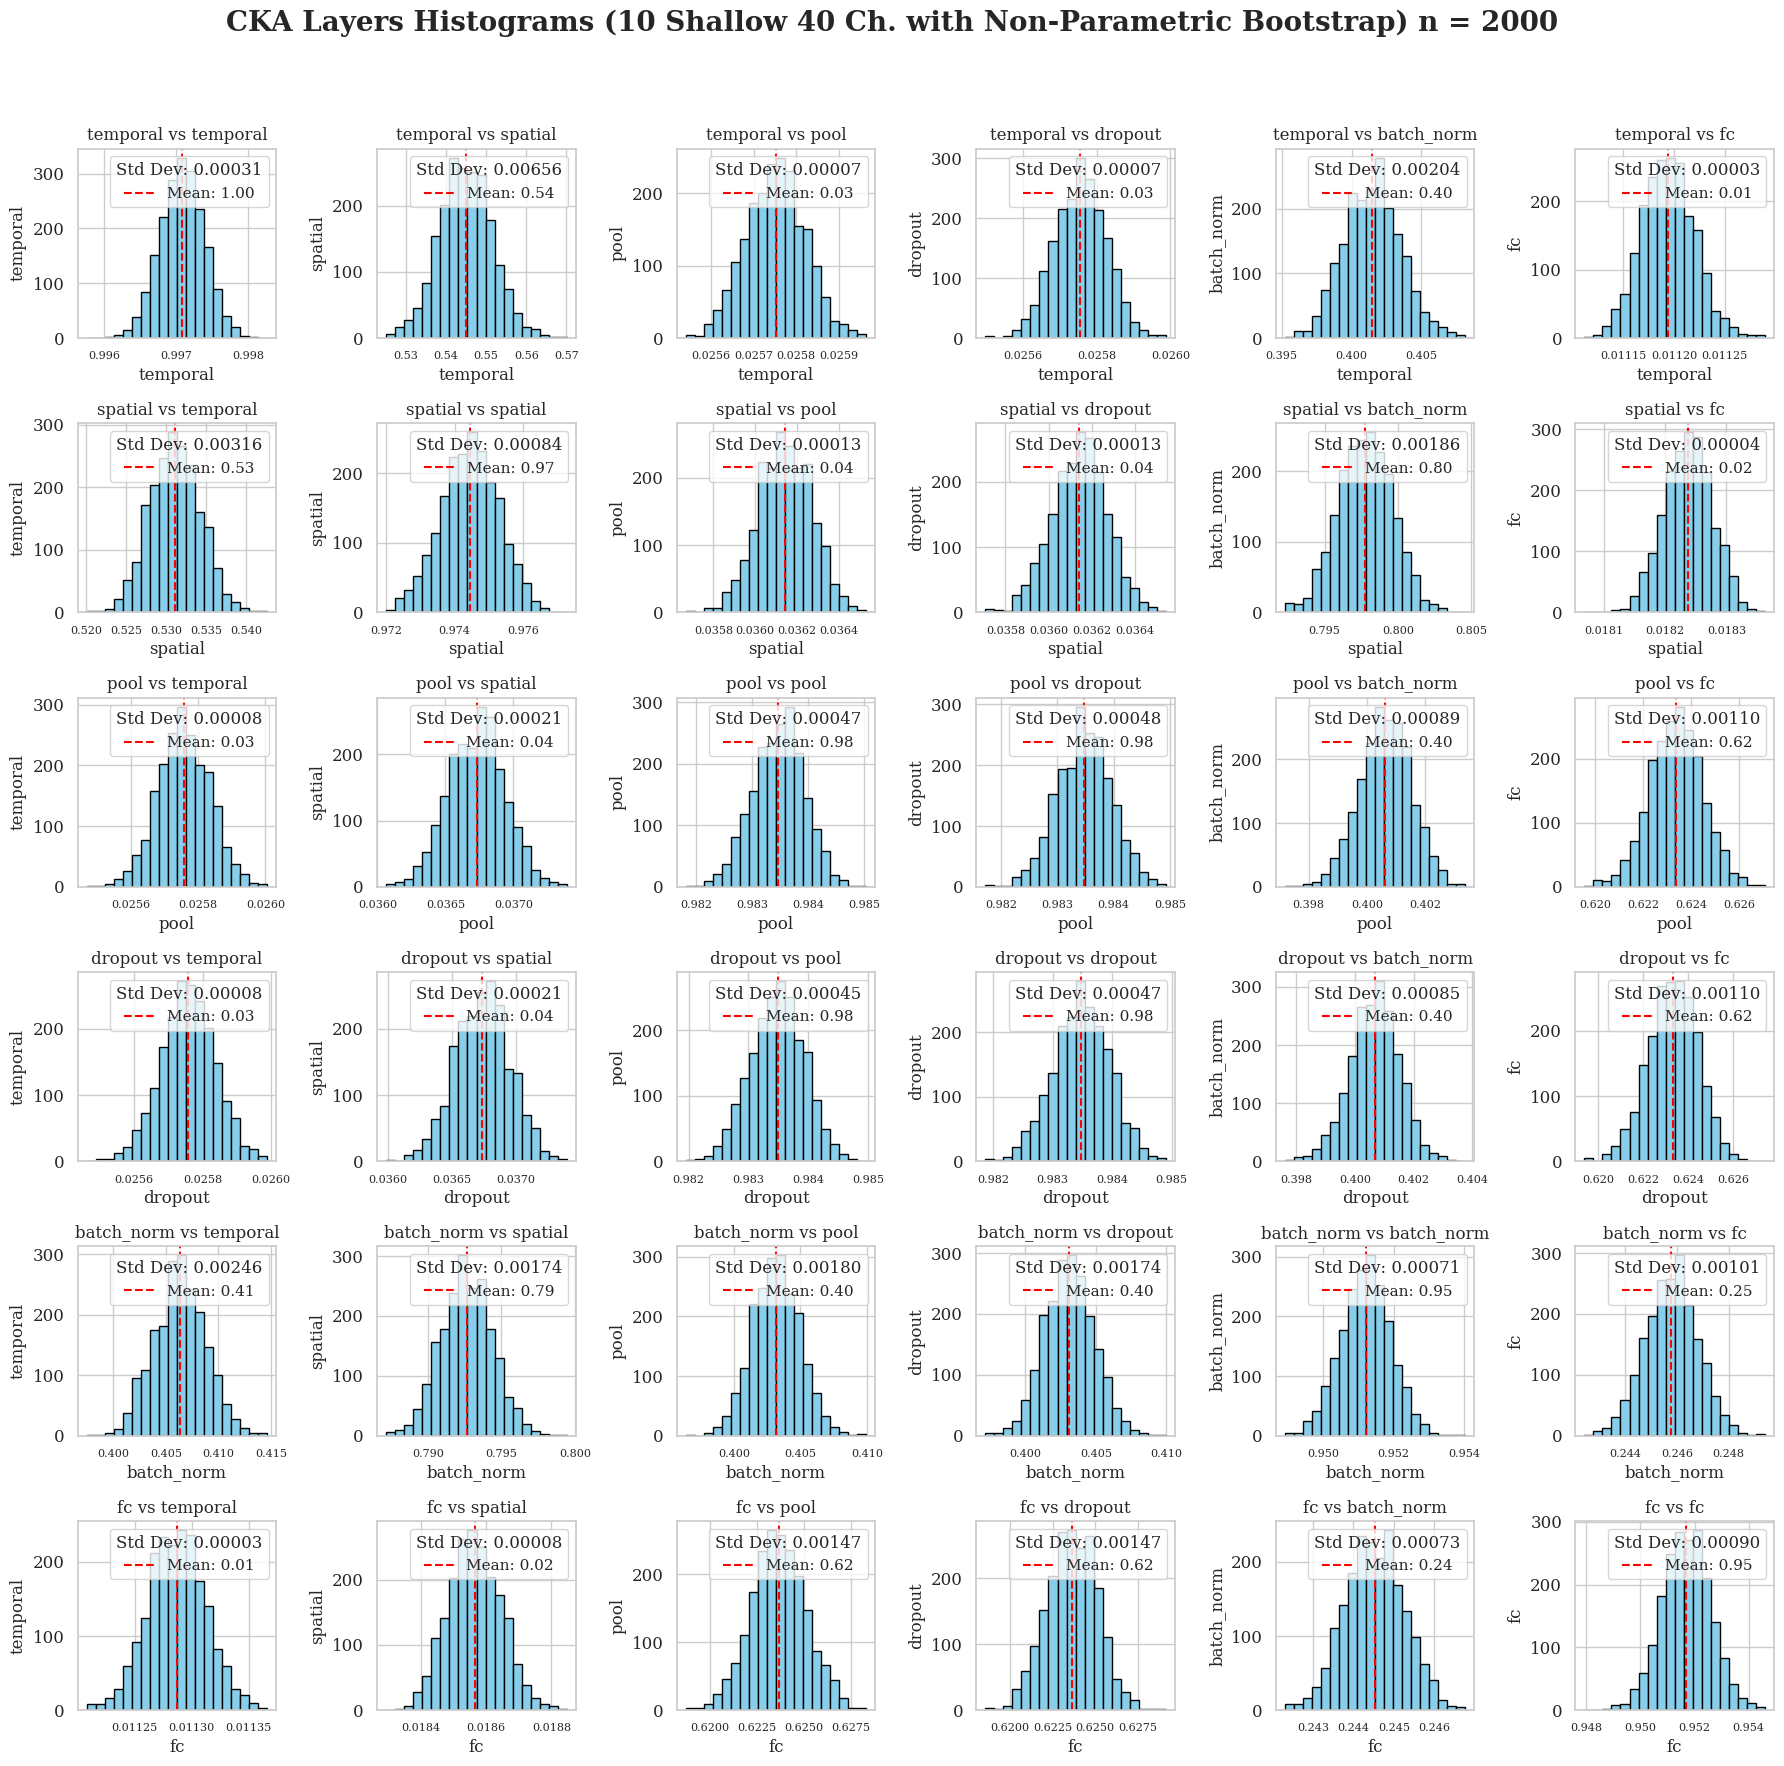

In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_cka_histograms_with_bootstrap(cka_counter, title):
    # Set up a grid of subplots
    rows_cols = int(len(list(cka_counter.keys()))**0.5)
    fig, axes = plt.subplots(rows_cols, rows_cols, figsize=(18, 18))

    # Flatten axes array so we can iterate over it
    axes = axes.flatten()

    # Dictionaries to store final mean and std for each layer pair
    mean_v_dict = {}
    std_v_dict = {}

    # Iterate over cka_counter and plot histograms
    for idx, ((layer1, layer2), values) in enumerate(cka_counter.items()):
        ax = axes[idx]

        # Apply non-parametric bootstrap
        meanx = non_parametric_bootstrap(np.array(values), np.mean)
        mean_v = np.mean(meanx)
        std_v = np.std(meanx)

        # Store the final mean and std dev
        mean_v_dict[(layer1, layer2)] = mean_v
        std_v_dict[(layer1, layer2)] = std_v

        # Plot histogram
        ax.hist(meanx, bins=20, color='skyblue', edgecolor='black')

        # Add vertical line for mean with label formatted to 2 decimal places
        ax.axvline(mean_v, color="red", linestyle="--", label=f"Mean: {mean_v:.2f}")

        # Add standard deviation to the legend
        ax.legend(title=f"Std Dev: {std_v:.5f}")

        # Set title and labels
        ax.set_title(f"{layer1} vs {layer2}")
        ax.set_xlabel(layer1)
        ax.set_ylabel(layer2)

        # Adjust tick label sizes
        ax.tick_params(axis='x', labelsize=8)
        ax.tick_params(axis='y', labelsize=12)

    # Hide any unused subplots
    for ax in axes[len(cka_counter):]:
        ax.set_visible(False)

    # Overall figure title
    fig.suptitle(title, fontsize=20, weight='bold')

    # Adjust layout to avoid overlap
    plt.tight_layout(rect=[0, 0, 1, 0.95])

    # Show the plot
    plt.show()

    return mean_v_dict, std_v_dict

# Example usage:
# Assuming `cka_counter` is your dictionary with CKA values
shallow_mean_v_dict, shallow_std_v_dict = plot_cka_histograms_with_bootstrap(
    shallow_counter_dict,
    'CKA Layers Histograms (10 Shallow 40 Ch. with Non-Parametric Bootstrap) n = 2000'
)


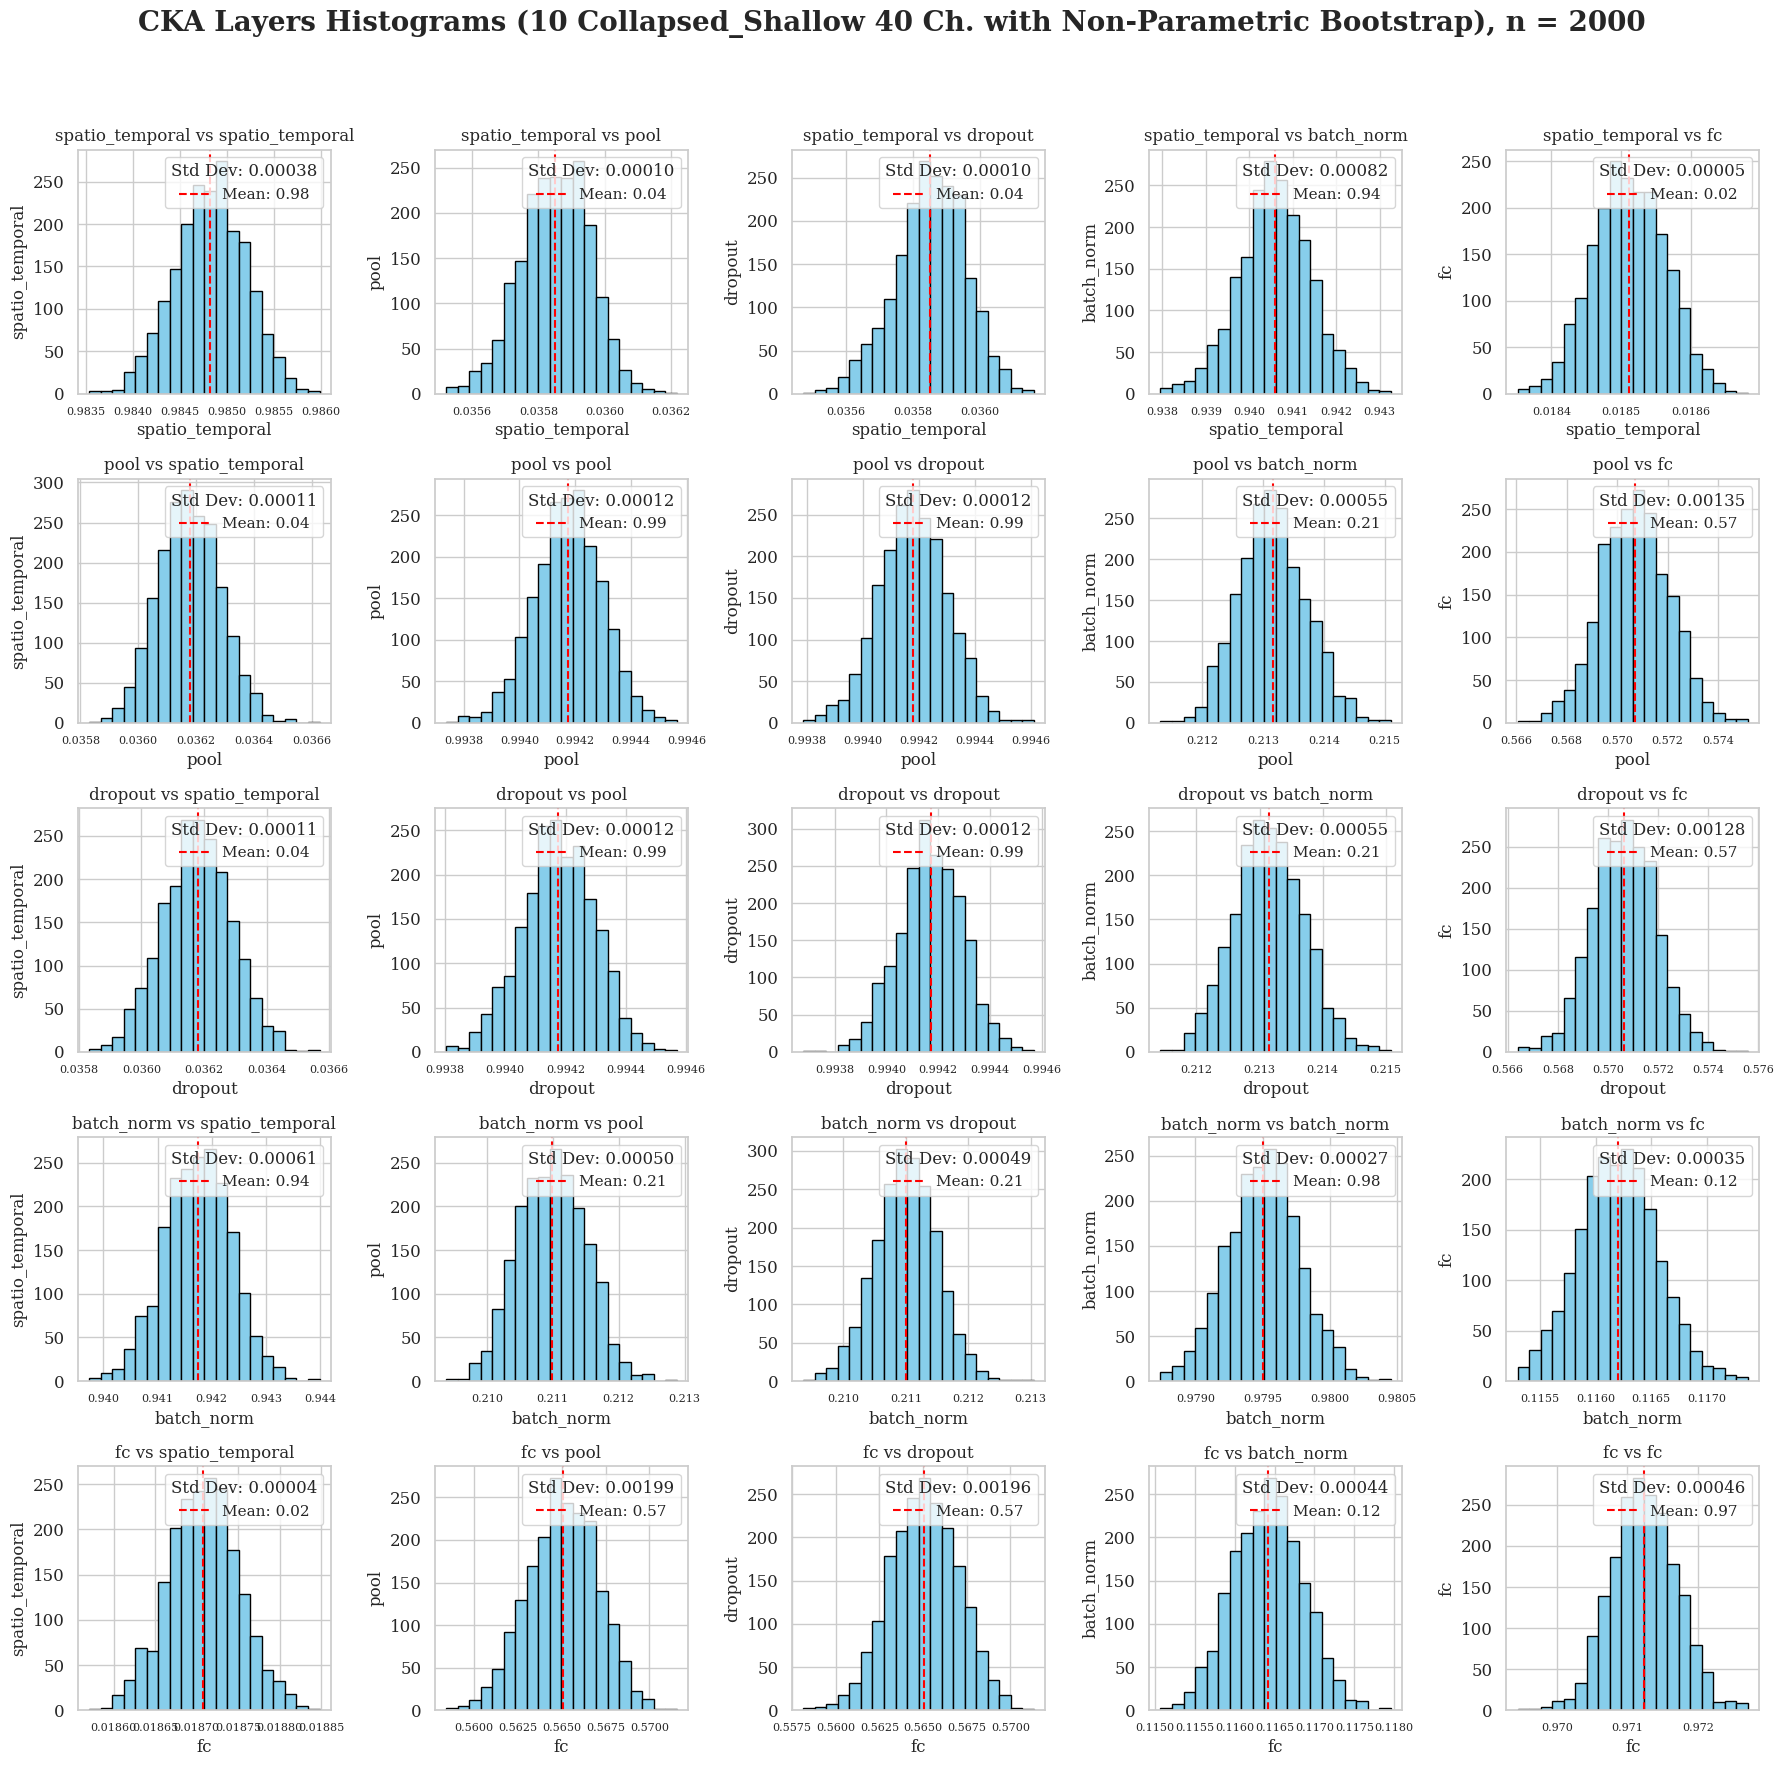

In [ ]:
collapsed_shallow_mean_v_dict, collapsed_shallow_std_v_dict = plot_cka_histograms_with_bootstrap(collapsed_shallow_counter_dict, 'CKA Layers Histograms (10 Collapsed_Shallow 40 Ch. with Non-Parametric Bootstrap), n = 2000')


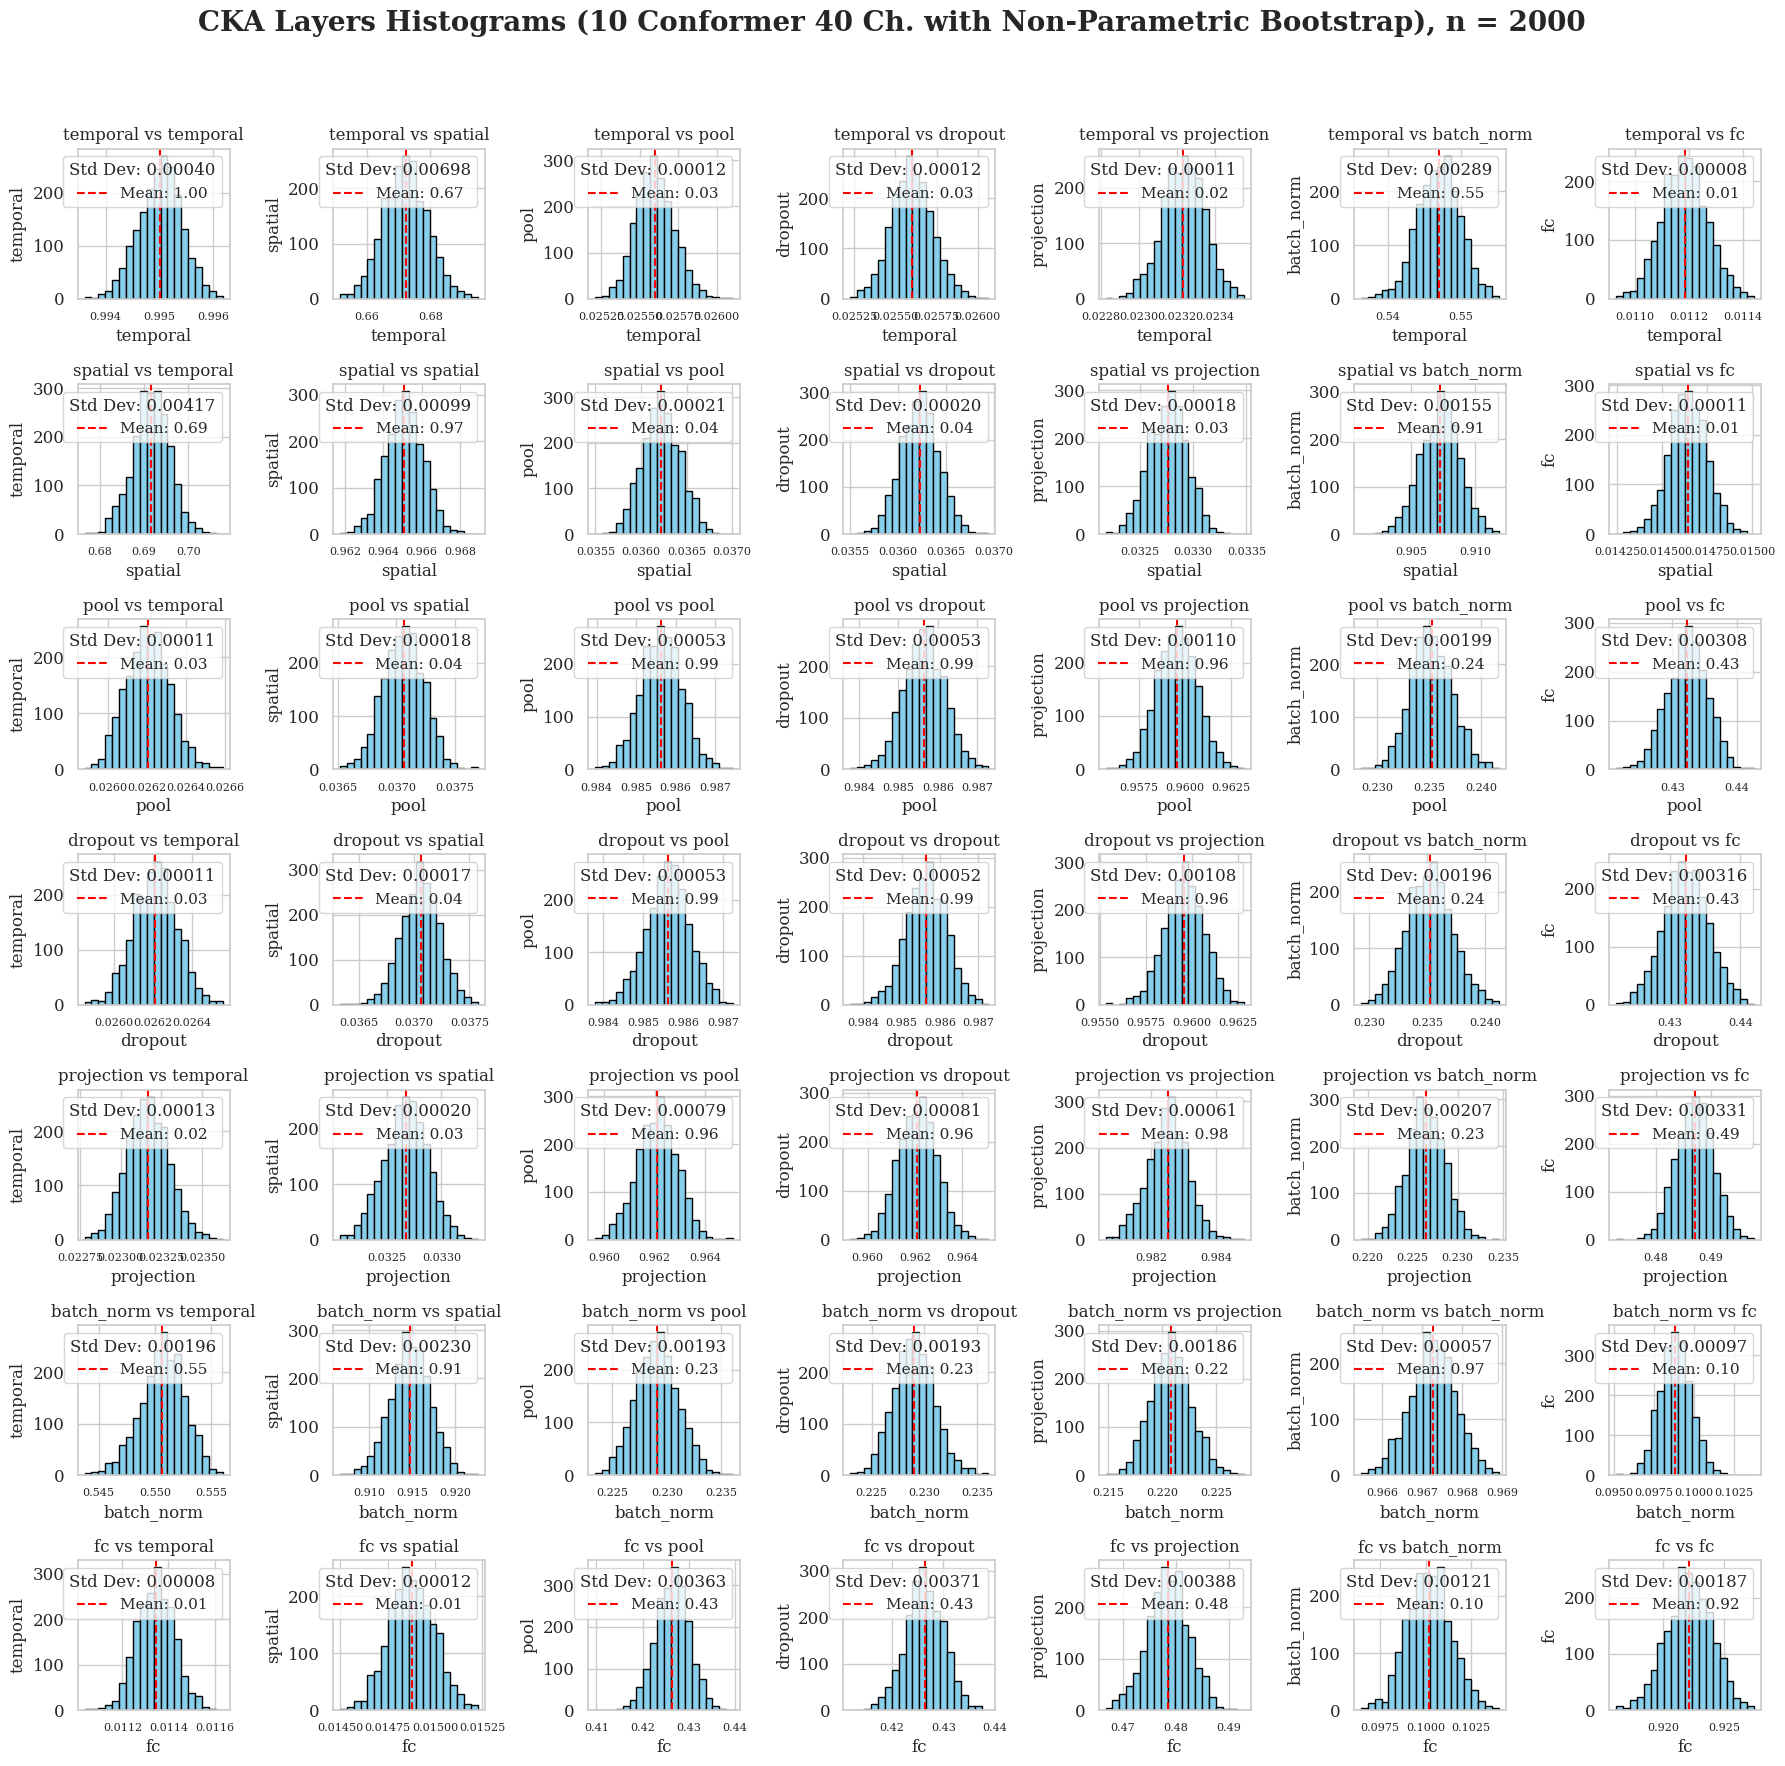

In [30]:
conformer_mean_v_dict, conformer_std_v_dict  =plot_cka_histograms_with_bootstrap(conformer_counter_dict, 'CKA Layers Histograms (10 Conformer 40 Ch. with Non-Parametric Bootstrap), n = 2000')


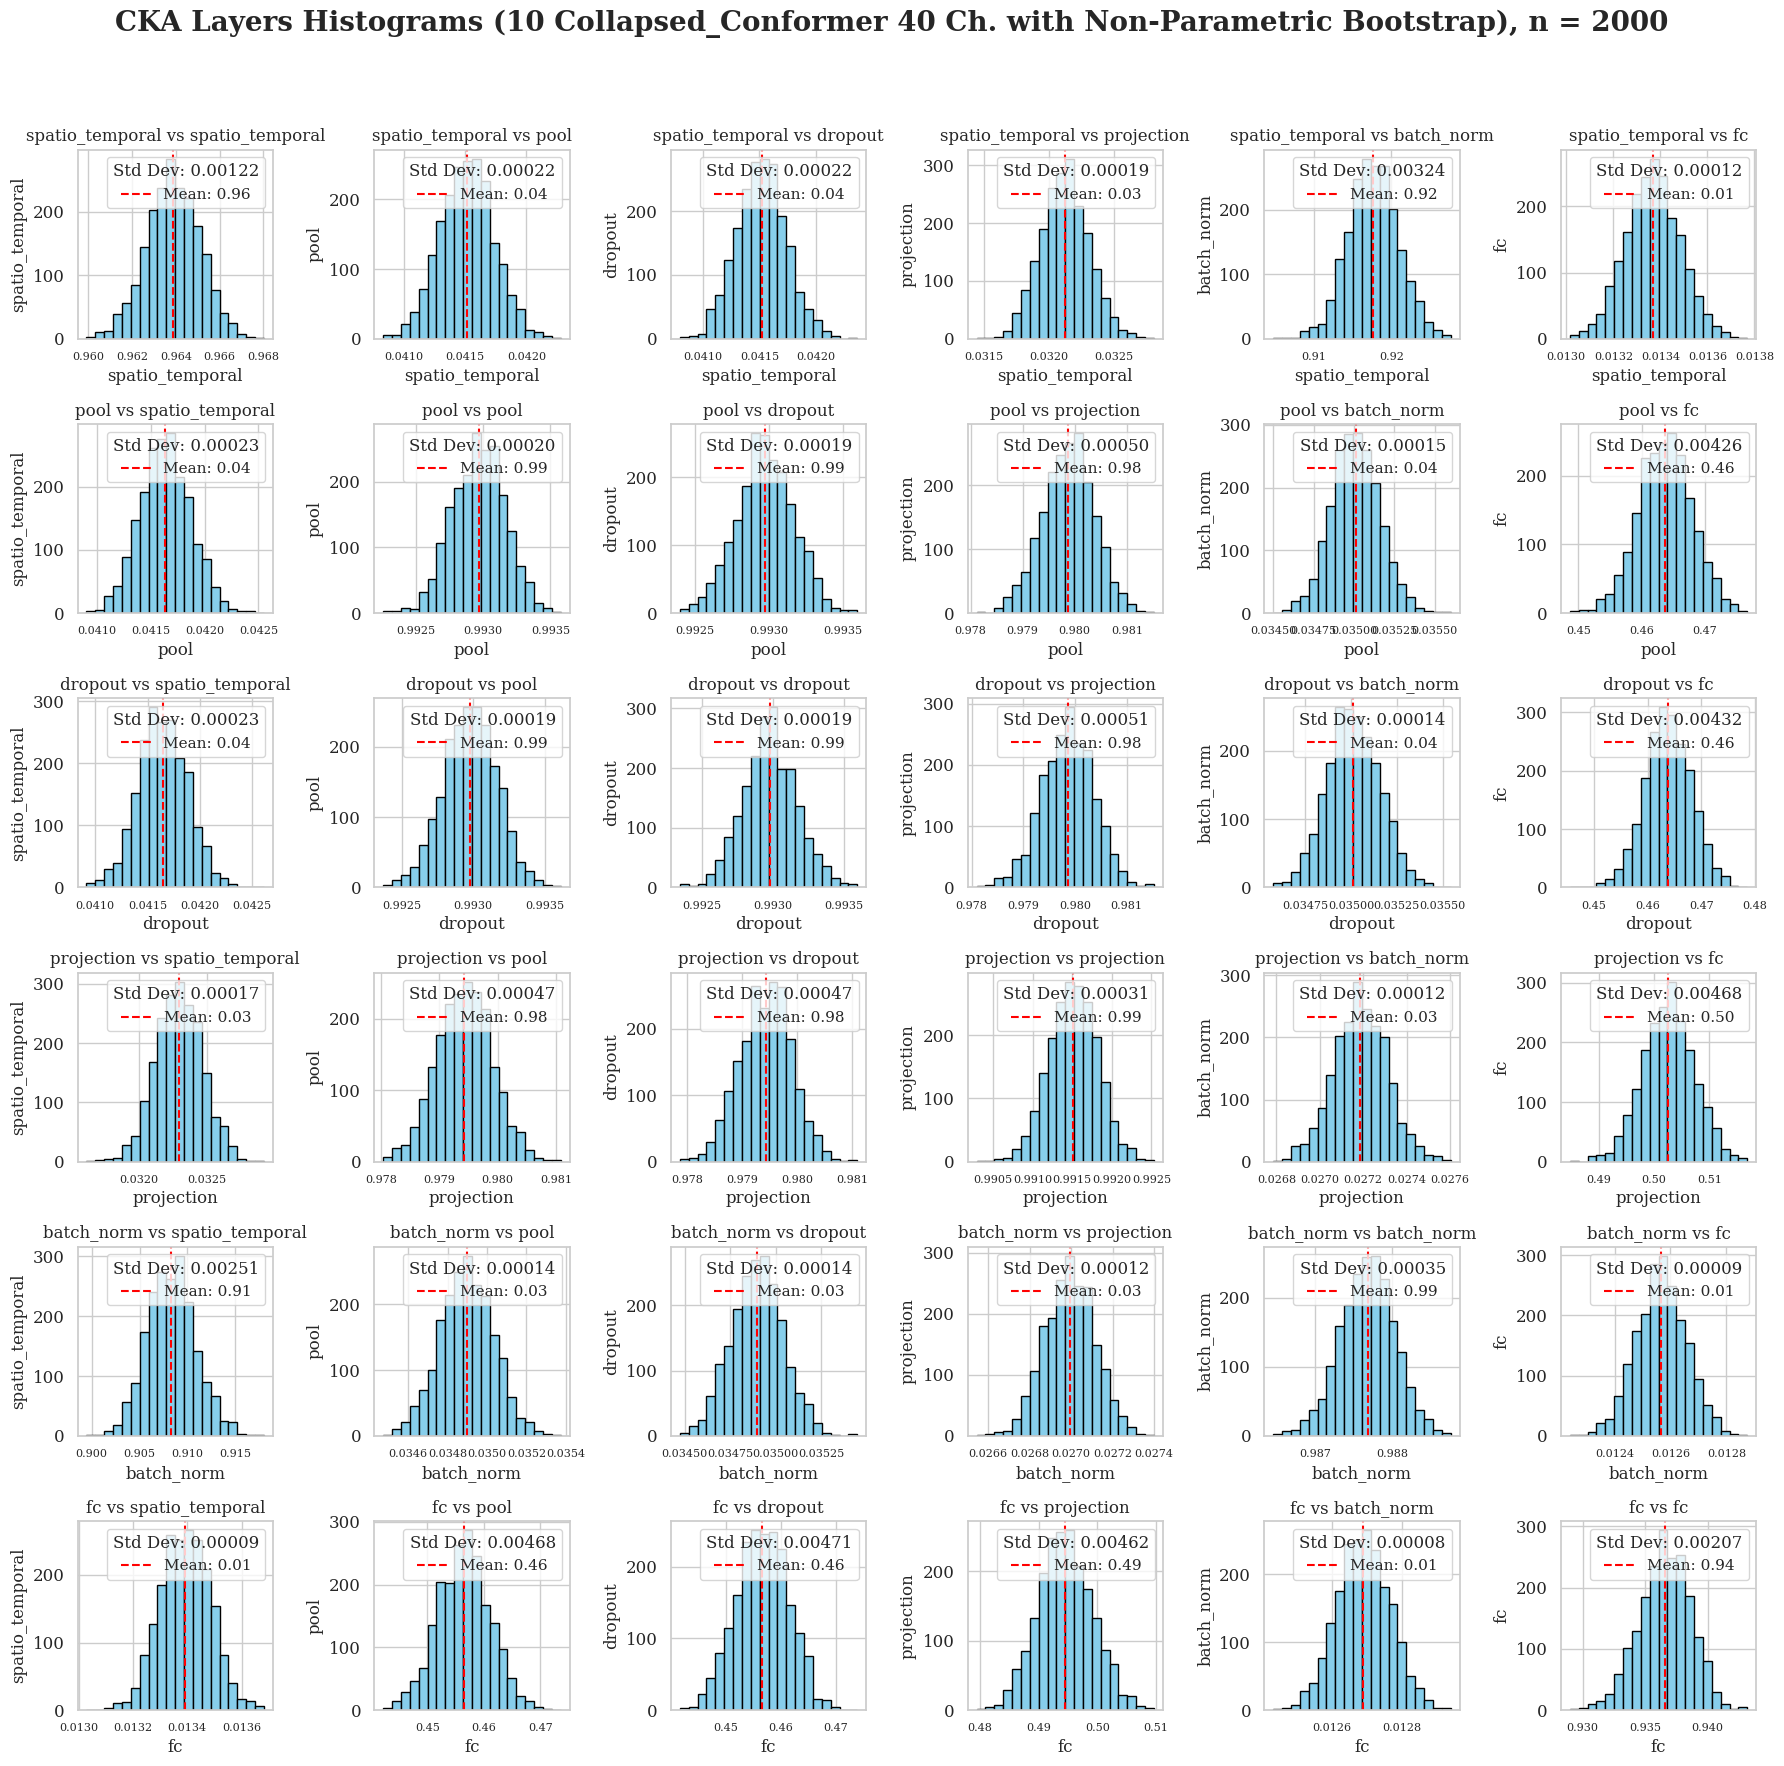

In [36]:
collapsed_conformer_mean_v_dict, collapsed_conformer_std_v_dict = plot_cka_histograms_with_bootstrap(Collapsed_conformer_counter_dict, 'CKA Layers Histograms (10 Collapsed_Conformer 40 Ch. with Non-Parametric Bootstrap), n = 2000')


In [38]:
#shallow_mean_v_dict, shallow_std_v_dict
#collapsed_shallow_mean_v_dict, collapsed_shallow_std_v_dict 
#conformer_mean_v_dict, conformer_std_v_dict 
#collapsed_conformer_mean_v_dict, collapsed_conformer_std_v_dict


combined_dict = {}

for (layer1, layer2) in shallow_mean_v_dict.keys():
    if layer1 == layer2:
        mean = shallow_mean_v_dict[(layer1, layer2)]
        std = shallow_std_v_dict[(layer1, layer2)]
        combined_dict[layer1] = [mean, std]

# Check the output
for layer, stats in combined_dict.items():
    print(layer, stats)


temporal [0.997083609646176, 0.00030827703304807375]
spatial [0.9744447307429279, 0.0008355397312540355]
pool [0.9834689165228196, 0.0004667927397661956]
dropout [0.9834830095061248, 0.0004695221855256322]
batch_norm [0.9512090208103575, 0.0007104409591221874]
fc [0.951675739144463, 0.0009034759506012496]


In [42]:
def get_diagonal_values(the_mean_dict,the_std_dict):
    combined_dict = {}
    for (layer1, layer2) in the_mean_dict.keys():
        if layer1 == layer2:
            mean = the_mean_dict[(layer1, layer2)]
            std = the_std_dict[(layer1, layer2)]
            combined_dict[layer1] = [mean, std]
    return combined_dict
shallow_diagonal_vals = get_diagonal_values(shallow_mean_v_dict, shallow_std_v_dict)
collapsed_shallow_diagonal_vals = get_diagonal_values(collapsed_shallow_mean_v_dict, collapsed_shallow_std_v_dict )
conformer_diagonal_vals = get_diagonal_values(conformer_mean_v_dict, conformer_std_v_dict)
collapsed_conformer_diagonal_vals = get_diagonal_values(collapsed_conformer_mean_v_dict, collapsed_conformer_std_v_dict)


In [46]:
print(shallow_diagonal_vals)
print(collapsed_shallow_diagonal_vals)
print(conformer_diagonal_vals)
print(collapsed_conformer_diagonal_vals)

{'temporal': [0.997083609646176, 0.00030827703304807375], 'spatial': [0.9744447307429279, 0.0008355397312540355], 'pool': [0.9834689165228196, 0.0004667927397661956], 'dropout': [0.9834830095061248, 0.0004695221855256322], 'batch_norm': [0.9512090208103575, 0.0007104409591221874], 'fc': [0.951675739144463, 0.0009034759506012496]}
{'spatio_temporal': [0.9848263966118189, 0.0003770270615753304], 'pool': [0.9941741377267145, 0.00012120224182315557], 'dropout': [0.9941708581922359, 0.00012245896878319298], 'batch_norm': [0.9795053410547232, 0.00026905609439300713], 'fc': [0.971236406381465, 0.00046374123288092845]}
{'temporal': [0.9950165055249471, 0.0003998253701033715], 'spatial': [0.9650957581668472, 0.0009887443532011887], 'pool': [0.9856318528739338, 0.0005251622277801635], 'dropout': [0.9856398497268442, 0.0005218214786762706], 'projection': [0.982510687100642, 0.0006101149156133816], 'batch_norm': [0.9672661245864098, 0.000569574776144375], 'fc': [0.9221514425422334, 0.0018722182534

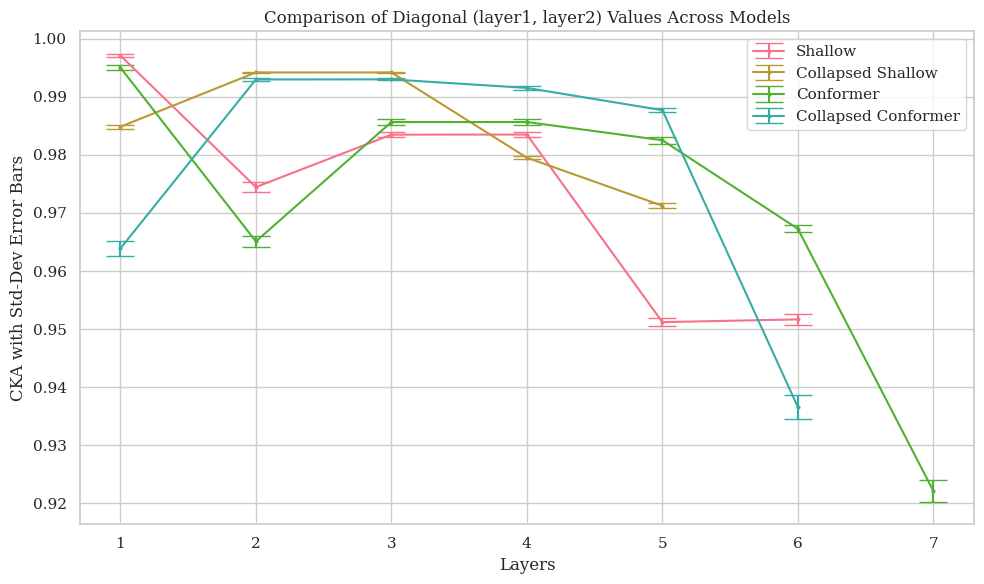

In [57]:


def plot_diagonal_values(*dicts, labels):
    plt.figure(figsize=(10, 6))

    for data, label in zip(dicts, labels):
        layers = list(range(1, len(data) + 1))  # Count the number of layers
        means = [data[layer][0] for layer in data]
        stds = [data[layer][1] for layer in data]

        # Use error bars to represent standard deviation
        plt.errorbar(layers, means, yerr=stds, fmt='o-', capsize=10, label=label, markersize= 2)

    plt.ylabel('CKA with Std-Dev Error Bars')
    plt.xlabel('Layers')
    plt.title('Comparison of Diagonal (layer1, layer2) Values Across Models')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage:
plot_diagonal_values(shallow_diagonal_vals, collapsed_shallow_diagonal_vals, conformer_diagonal_vals, collapsed_conformer_diagonal_vals,
                     labels=['Shallow', 'Collapsed Shallow', 'Conformer', 'Collapsed Conformer'])
